Втора лабораториска вежба по предметот Податочно рударство

Изработиле: Јана Митровска (181080) и Бојан Петрушевски (162012)

Податочно множество:

Тема: Дрва на одлучување


# **Reading the dataset**

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/netflix.csv')

In [ ]:
data.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


# **Decision trees**

In [ ]:
data['cast'] = data['cast'].fillna('Unknown')
data['date_added'] = data['date_added'].fillna('Unknown')

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy')

In [ ]:
data_encoded = data.apply(LabelEncoder().fit_transform)
data_encoded

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1,82,3748,3160,6,207,71,8,3,398,3912
1,1,1111,0,124,1789,1589,42,391,67,8,91,310,1390
2,2,2222,0,67,1253,6200,60,378,62,5,76,336,7172
3,3,3333,0,126,3355,1788,75,1209,60,4,78,47,3936
4,4,4444,0,60,3095,2924,75,584,59,4,121,294,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,7782,7537,0,7759,1793,2487,67,1352,56,8,97,310,6876
7783,7783,7538,0,7761,2536,6474,28,985,66,6,109,312,889
7784,7784,7539,0,7762,3748,4601,76,1516,70,8,42,269,4197
7785,7785,7540,1,7763,3748,140,1,1418,70,9,0,368,2823


In [ ]:
X = data_encoded.drop(['type'], axis = 1)
Y = data_encoded.type.values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predicted = dt.predict(X_test)

In [ ]:
dt.feature_importances_

array([0.        , 0.        , 0.00159038, 0.        , 0.00175968,
       0.        , 0.        , 0.        , 0.        , 0.99253098,
       0.00221722, 0.00190174])

In [ ]:
result_data = pd.DataFrame({"actual":Y_test, "predicted":predicted})

In [ ]:
result_data

,actual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
1553,1,1
1554,0,0
1555,0,0
1556,1,1


In [ ]:
#1074 вредности биле 0 и се предвиделе како 0, 2 вредности биле 0 и се предвиделе како 1
#0 вредности биле 1 и се предвиделе како 0, 482 вредности биле 1 и се предвиделе како 1
confusion_matrix = pd.crosstab(result_data['actual'], result_data['predicted'], rownames={'Actual'},
                               colnames=['Predicted'])
print(confusion_matrix) 

Predicted     0    1
Actual              
0          1074    2
1             0  482


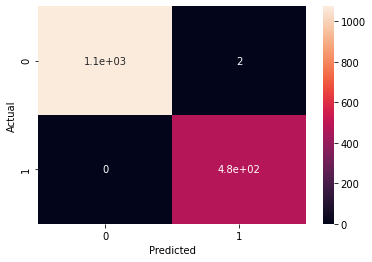

In [ ]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
#Оваа метрика пресметува точност на подмножество. 
#Резултатот од тестот е 0.9987 од максимална вредност 1. 
accuracy_score(result_data['actual'], result_data['predicted']) 

0.9987163029525032

In [ ]:
#Покажува просечна точност на предвидениот резултат.
#Резултатот од тестот е 0.995 од максимална вредност 1.
precision_score(result_data['actual'], result_data['predicted']) 

0.9958677685950413

In [ ]:
#Го споредува односот помеѓу точните позитивни и лажните негативни. Со помош на оваа формула се пресметува tp / (tp + fn).
#Резултатот од тестот е 1 од максимална вредност 1.
recall_score(result_data['actual'], result_data['predicted'])

1.0

In [ ]:
#Резултатот Ф1 може да се толкува како пондериран просек на прецизност и отповикување.
#Резултатот од тестот е 0.998 од максимална вредност 1.
f1_score(result_data['actual'], result_data['predicted'])

0.9979296066252588

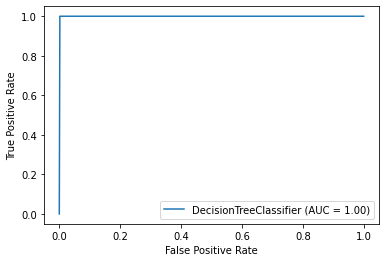

In [ ]:
#Крива која ја покажува прецизноста на DecisionTreeClassifier 
plot_roc_curve(dt, X_test, Y_test)
plt.show()